In [127]:
from twarc import Twarc
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
pd.options.display.max_colwidth = 10000

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ozgekaracam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [128]:
# Read Data sets into the notebook
trump_df = pd.read_csv(r"us-election-2020-tweets/hashtag_donaldtrump.csv",lineterminator='\n')
biden_df = pd.read_csv(r"us-election-2020-tweets/hashtag_joebiden.csv",lineterminator='\n')

In [129]:
trump_df['country']=trump_df['country'].replace({"United States of America" : "US", "United States" : "US"})
biden_df['country']=biden_df['country'].replace({"United States of America" : "US", "United States" : "US"})
trump_df = trump_df[(trump_df.country == "US")]
biden_df = biden_df[(biden_df.country == "US")]

In [131]:
# Check shape of both data frames
print(trump_df.shape)
print(biden_df.shape)

(213263, 21)
(181137, 21)


In [132]:
# Check Info of both data sets

print(trump_df.info())
print(biden_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213263 entries, 0 to 970905
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            213263 non-null  object 
 1   tweet_id              213263 non-null  float64
 2   tweet                 213263 non-null  object 
 3   likes                 213263 non-null  float64
 4   retweet_count         213263 non-null  float64
 5   source                213247 non-null  object 
 6   user_id               213263 non-null  float64
 7   user_name             213262 non-null  object 
 8   user_screen_name      213263 non-null  object 
 9   user_description      200815 non-null  object 
 10  user_join_date        213263 non-null  object 
 11  user_followers_count  213263 non-null  float64
 12  user_location         213263 non-null  object 
 13  lat                   213263 non-null  float64
 14  long                  213263 non-null  float64
 15  

In [17]:
# Clear no state, use trump_df['user_location'] - TODO

In [133]:
# Adding a new column to differentiate between tweets of Biden and Trump
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"

In [19]:
# Concat the data frames
Data_Mixed = pd.concat([trump_df,biden_df])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,sentiment_scores,sentiment,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU\n⠀⏹️ Facebook e Instagram\n⠀🏙️ Philadelphia: /elsollatinonewspaper\n⠀🌅 Miami: /elsollatinonewsmiami,...,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,"{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.5905}",Positive,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",...,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral,TRUMP
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisForVP #IStandWithEllen @KamalaHarris @JoeBiden #TeamJoe #KHive #BidenHarris2020ToSaveAmerica,...,-117.228648,NaN,US,North America,California,CA,2020-10-21 00:00:01.866082651,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.4912}",Negative,TRUMP
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There won’t be many of them. Unless you all have been voting more than once again. But God prevails. BO was the most corrupt President ever. Dark to light. Your lies are all coming through. They wouldn’t last forever. #Trump,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two extraordinary kids & labradoodle lover of “Honey Buns” Trust the Plan! Always Save Our Children!",...,-82.688140,NaN,US,North America,Ohio,OH,2020-10-21 00:00:02.612515712,"{'neg': 0.078, 'neu': 0.866, 'pos': 0.056, 'compound': -0.2617}",Negative,TRUMP


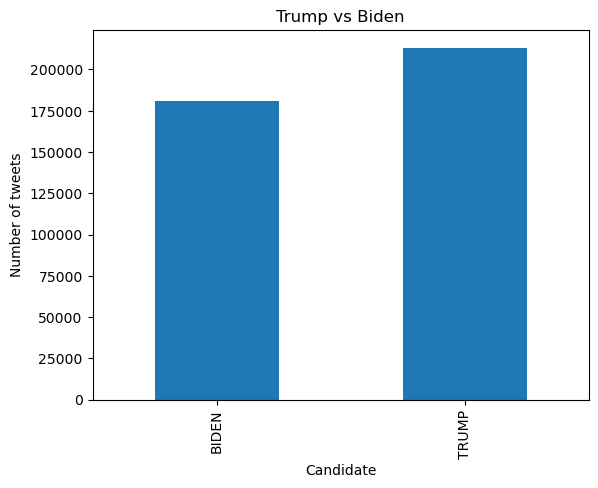

In [134]:
# Plot the number of tweets for each candidate
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show()

In [135]:
# Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().sort_values(ascending=False).head(20).reset_index()
state_df

,state,Candidate,tweet
0,California,TRUMP,31149
1,California,BIDEN,25817
2,New York,TRUMP,22881
3,New York,BIDEN,21005
4,Florida,TRUMP,16559
5,Texas,TRUMP,16491
6,Texas,BIDEN,14191
7,Florida,BIDEN,13278
8,District of Columbia,TRUMP,9684
9,District of Columbia,BIDEN,7055


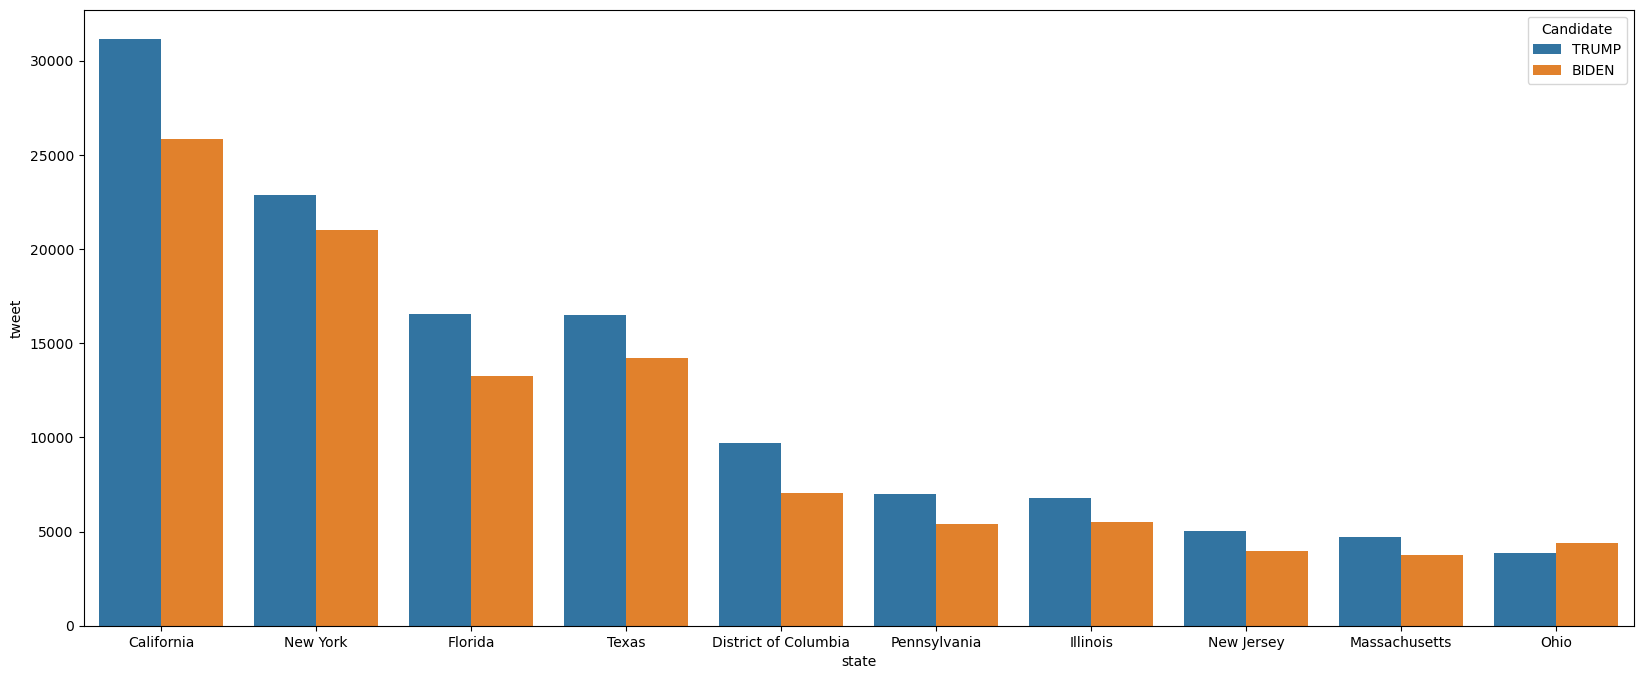

In [136]:
#Plot top 10 states with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

In [137]:
def sentimentVerdict(sentiment):
    if sentiment['compound'] >= 0.05:
        return "Positive"
    elif sentiment['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [138]:
#TRUMP

trump_df['sentiment_scores'] = trump_df['tweet'].apply(lambda x: sid.polarity_scores(x))
trump_df['sentiment'] = trump_df['sentiment_scores'].apply(lambda x: sentimentVerdict(x))


In [145]:
print(trump_df['sentiment'].value_counts())

Negative    72873
Positive    71687
Neutral     68703
Name: sentiment, dtype: int64


In [144]:
#BIDEN

biden_df['sentiment_scores'] = biden_df['tweet'].apply(lambda x: sid.polarity_scores(x))
biden_df['sentiment'] = biden_df['sentiment_scores'].apply(lambda x: sentimentVerdict(x))


In [146]:
print(biden_df['sentiment'].value_counts())

Positive    68656
Neutral     67930
Negative    44551
Name: sentiment, dtype: int64


In [140]:
trump_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,Candidate,sentiment_scores,sentiment
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU\n⠀⏹️ Facebook e Instagram\n⠀🏙️ Philadelphia: /elsollatinonewspaper\n⠀🌅 Miami: /elsollatinonewsmiami,...,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,TRUMP,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",...,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP,"{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.5905}",Positive
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",...,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
5,2020-10-15 00:00:17,1.316529e+18,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!,2.0,0.0,Twitter for Android,1.138416e+09,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisForVP #IStandWithEllen @KamalaHarris @JoeBiden #TeamJoe #KHive #BidenHarris2020ToSaveAmerica,...,-117.228648,NaN,US,North America,California,CA,2020-10-21 00:00:01.866082651,TRUMP,"{'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.4912}",Negative
7,2020-10-15 00:00:18,1.316529e+18,@DeeviousDenise @realDonaldTrump @nypost There won’t be many of them. Unless you all have been voting more than once again. But God prevails. BO was the most corrupt President ever. Dark to light. Your lies are all coming through. They wouldn’t last forever. #Trump,0.0,0.0,Twitter for iPhone,9.007611e+17,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,sm_gulledge,"Patriot, Wife, “Shaken not Stirred” Mom of two extraordinary kids & labradoodle lover of “Honey Buns” Trust the Plan! Always Save Our Children!",...,-82.688140,NaN,US,North America,Ohio,OH,2020-10-21 00:00:02.612515712,TRUMP,"{'neg': 0.078, 'neu': 0.866, 'pos': 0.056, 'compound': -0.2617}",Negative


In [147]:
biden_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,Candidate,sentiment_scores,sentiment
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU\n⠀⏹️ Facebook e Instagram\n⠀🏙️ Philadelphia: /elsollatinonewspaper\n⠀🌅 Miami: /elsollatinonewsmiami,...,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch This is how #Biden made his ! #TrumpIsNotAmerica !\nhttps://t.co/uBqAFU86Ip,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,-109.171431,NaN,US,North America,Montana,MT,2020-10-21 00:00:01.035654566,BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #BidenEmail #Corruption https://t.co/C6clrtshQl,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,"A Silicon Valley #independent #News #Media #Startup\n *If you have any tips you'd like us to cover, please DM or tag us*",...,-118.755997,NaN,US,North America,California,CA,2020-10-21 00:00:02.071309132,BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral
6,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORED by Twitter to manipulate a US election in favor of #JoeBiden and against #Trump.\n\nbut CCP from #China or porn on Twitter? \n\nThat’s always been fine for @jack @vijaya @dickc @KatieS.\n\n@marciadorsey is @jack sick?",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by $4T,changeillinois,"Illinois, home of Lincoln and Reagan, used to be crossroads of America. Now, it's epicenter of political mafia, corruption and #ChicagoWay. #ChangeIllinois",...,-87.624421,Chicago,US,North America,Illinois,IL,2020-10-21 00:00:03.106963698,BIDEN,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'compound': -0.4137}",Negative
11,2020-10-15 00:00:57,1.316529e+18,"FBI Allegedly Obtained Hunter Biden Computer, Data on Ukraine Dealings, Report Claims #JoeBiden #HunterBiden https://t.co/pDNmB0NqRU",0.0,0.0,Twitter for Android,9.607387e+17,RLCompton,NewfoundStudio,"""There are things known and there are things unknown, and in between are the doors of perception."" Aldous Huxley",...,-85.155141,NaN,US,North America,Kentucky,KY,2020-10-21 00:00:05.696100113,BIDEN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",Neutral


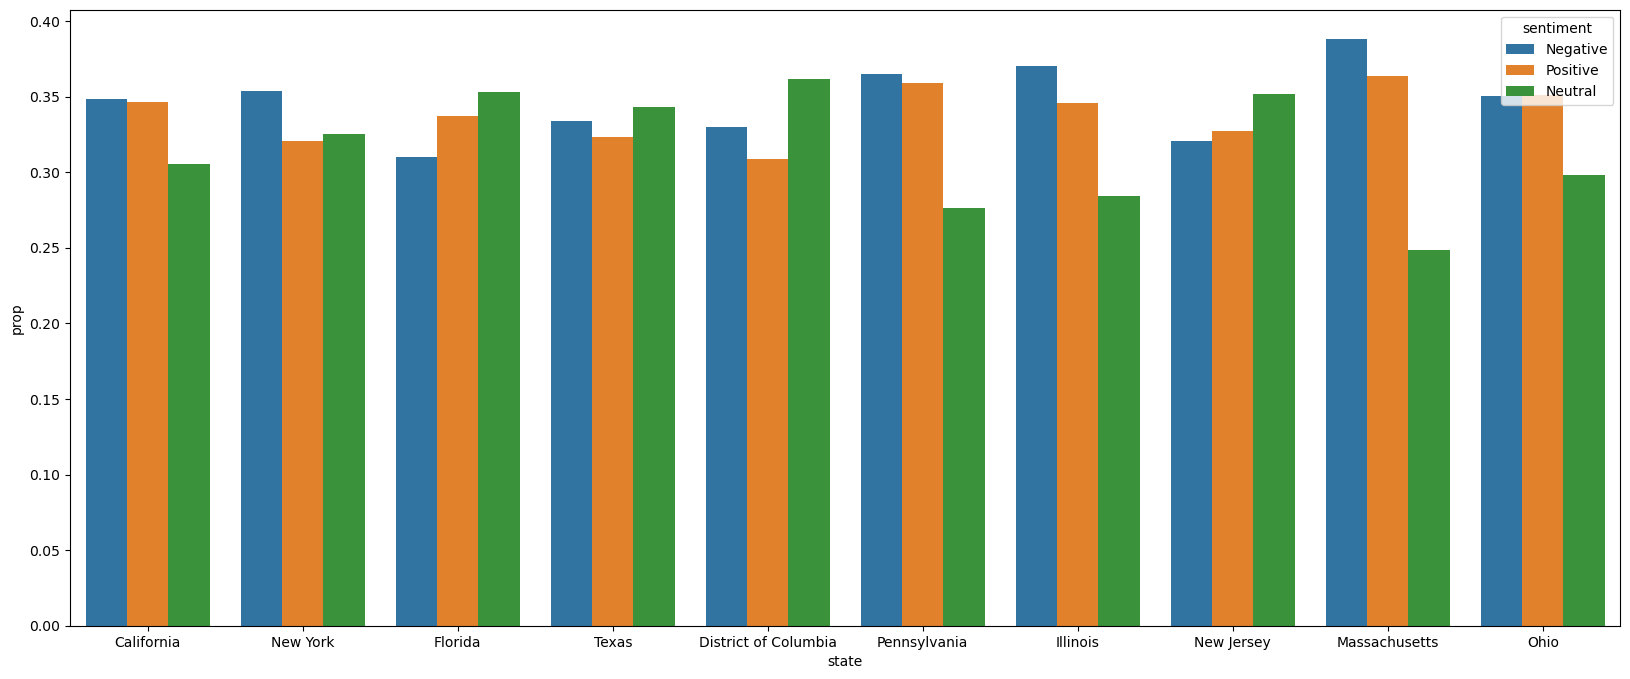

In [143]:
# Sentiment analysis for Trump from each state in top10 states

trump_sent_state = (trump_df
    .groupby(["state", "sentiment"])
    .size().rename("sent_total")
    .reset_index()
    .groupby(["state"])
    .apply(lambda grp: grp.assign(state_total = lambda x: x.sent_total.sum()))
    .reset_index()
    .groupby(["state"])
    .apply(lambda grp: grp.assign(prop = lambda x: x.sent_total / x.sent_total.sum())))
    

trump_sent_state = trump_sent_state.sort_values("state_total", ascending=False).head(30)


plt.figure(figsize=(20,8))
sns.barplot(data=trump_sent_state, x='state', y='prop', hue="sentiment")
plt.show()



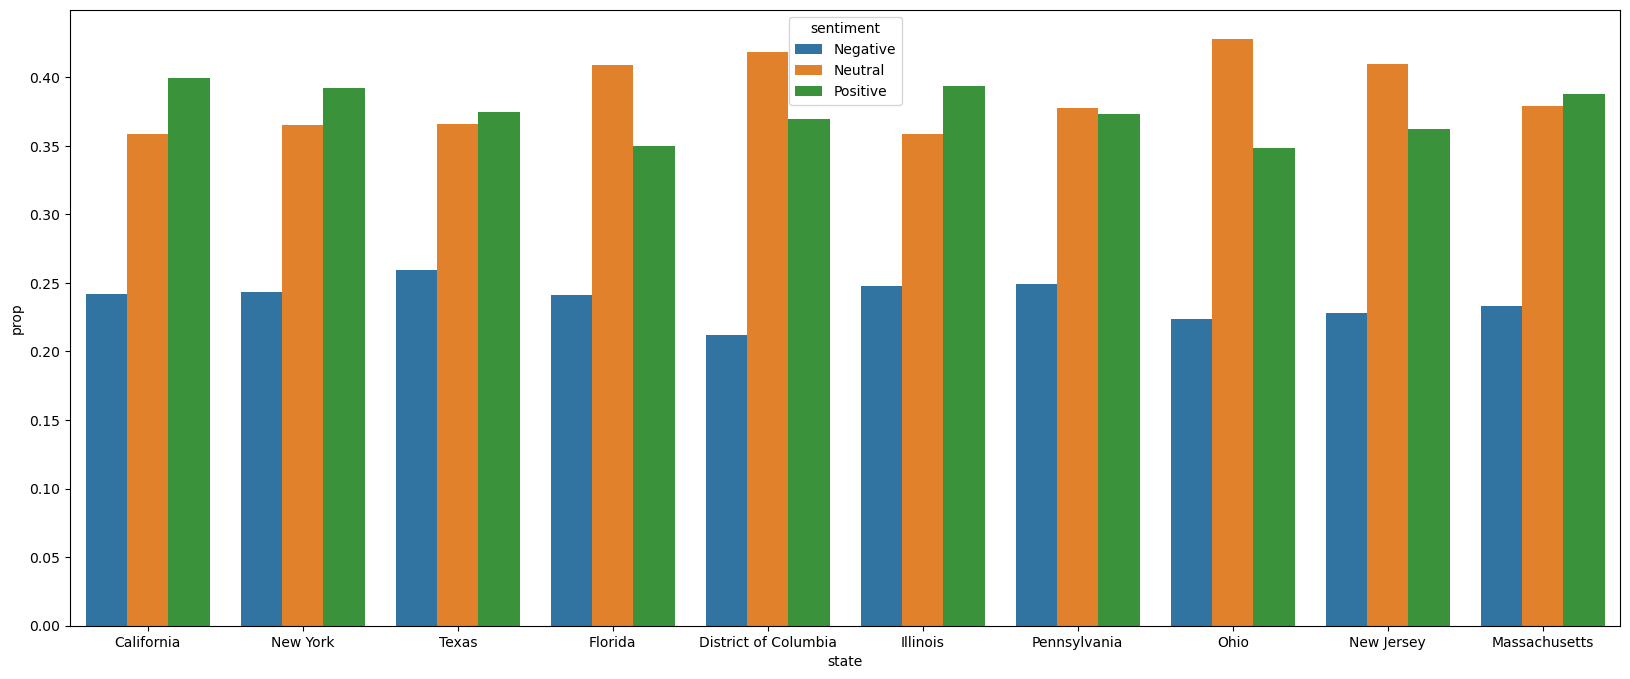

In [148]:
# Sentiment analysis for Biden from each state in top10 states

biden_sent_state = (biden_df
    .groupby(["state", "sentiment"])
    .size().rename("sent_total")
    .reset_index()
    .groupby(["state"])
    .apply(lambda grp: grp.assign(state_total = lambda x: x.sent_total.sum()))
    .reset_index()
    .groupby(["state"])
    .apply(lambda grp: grp.assign(prop = lambda x: x.sent_total / x.sent_total.sum())))
    

biden_sent_state = biden_sent_state.sort_values("state_total", ascending=False).head(30)


plt.figure(figsize=(20,8))
sns.barplot(data=biden_sent_state, x='state', y='prop', hue="sentiment")
plt.show()


In [154]:
# Adding a new column to differentiate between tweets of Biden and Trump
trump_sent_state["Candidate"] = "TRUMP"
biden_sent_state["Candidate"] = "BIDEN"
# Concat the data frames
Data_Mixed = pd.concat([trump_sent_state,biden_sent_state])
#Data_Mixed.sort_values(by='state_total')
Data_Mixed

,index,state,sentiment,sent_total,state_total,prop,Candidate
12,12,California,Negative,10856,31149,0.348518,TRUMP
14,14,California,Positive,10790,31149,0.346400,TRUMP
13,13,California,Neutral,9503,31149,0.305082,TRUMP
98,98,New York,Negative,8097,22881,0.353874,TRUMP
100,100,New York,Positive,7337,22881,0.320659,TRUMP
99,99,New York,Neutral,7447,22881,0.325467,TRUMP
28,28,Florida,Neutral,5850,16559,0.353282,TRUMP
27,27,Florida,Negative,5131,16559,0.309862,TRUMP
29,29,Florida,Positive,5578,16559,0.336856,TRUMP
136,136,Texas,Positive,5325,16491,0.322903,TRUMP
